# Кластерный анализ 
+ K-means
+ DBSCAN


### K-means

In [1]:
#make_blobs()

In [2]:
import matplotlib.pyplot as plt

from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs

import numpy as np

In [3]:
n_samples = 4000
n_components = 4

X, y_true = make_blobs(
    n_samples=n_samples,
    centers=n_components,
    cluster_std=0.60,
    random_state=88
)

X = X[:, ::-1]

In [4]:
X

array([[-6.37457109,  4.71324785],
       [ 4.10585138,  5.22155677],
       [ 3.11957362,  3.01585289],
       ...,
       [ 4.11752728,  4.63032347],
       [-5.95815093,  5.0868533 ],
       [-5.2617451 ,  5.35176073]])

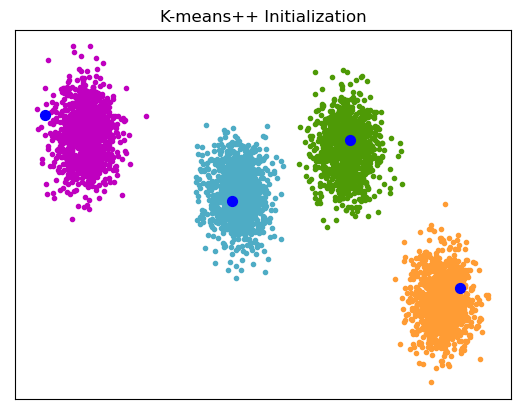

In [5]:
centers_init, indices = kmeans_plusplus(X, n_clusters=4, random_state=88)

plt.figure(1)
colors = ['#4EACC5', '#FF9C34', '#4E9A06', 'm']

for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker='.')

plt.scatter(centers_init[:, 0], centers_init[:, 1], c='b', s=50)
plt.title('K-means++ Initialization')
plt.xticks([])
plt.yticks([])
plt.show()

### Алгоритм K-means

Алгоритм:\
Шаг 1: Выбираем число кластеров, 𝑘\
Шаг 2: Выбираем 𝑘 случайных значений (точек, центроидов)\
Шаг 3: Создаем 𝑘 кластеров:\
Относим каждую точку к тому кластеру, к центру которого она ближе\
Шаг 4: Вычисляем новый центроид каждого кластера («средняя координата»)\
Шаг 5: Если алгоритм сошелся, то конец, иначе шаг 3. 

In [6]:
def k_means(X, n_clusters, max_iter=100):
    
    centers = X[np.random.choice(len(X), n_clusters, replace=False)]
    
    for _ in range(max_iter):
        labels = np.argmin(np.linalg.norm(X[:, None] - centers, axis=2), axis=1)
        
        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
        
        if np.all(centers == new_centers):
            break
        
        centers = new_centers
    
    return centers, labels

In [7]:
# применение K-means
centers, labels = k_means(X, n_clusters=4)

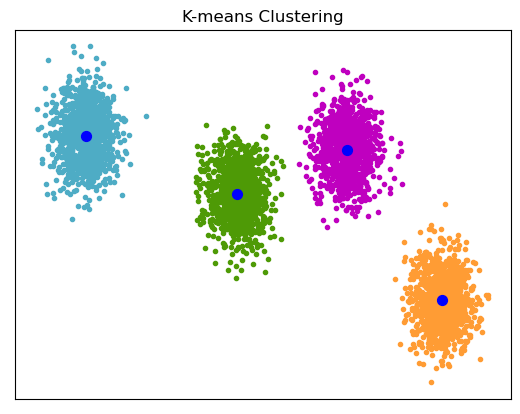

In [8]:
# Результат
plt.figure(1)
colors = ['#4EACC5', '#FF9C34', '#4E9A06', 'm']

for k, col in enumerate(colors):
    cluster_data = labels == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker='.')

plt.scatter(centers[:, 0], centers[:, 1], c='b', s=50)
plt.title('K-means Clustering')
plt.xticks([])
plt.yticks([])
plt.show()

### DBSCAN

In [10]:
from sklearn.cluster import DBSCAN

In [11]:
# Генерация данных
n_samples = 4000
n_components = 4
X, y_true = make_blobs(n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=88)
X = X[:, ::-1]

In [22]:
centers = [[2, 2], [-2, -2], [2, -2]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=88
)

In [40]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)

dbscan.fit(X)

DBSCAN(min_samples=10)

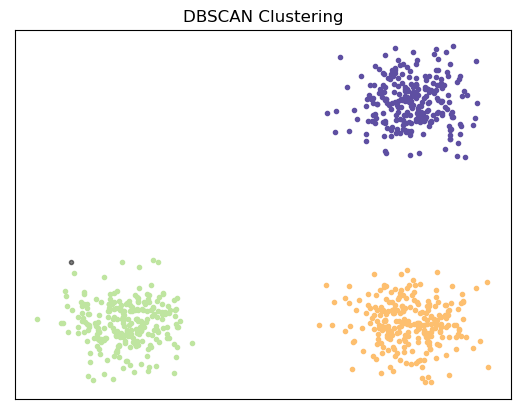

In [41]:
# Результат
plt.figure(2)
unique_labels = np.unique(dbscan.labels_)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Кластеры с меткой -1 считаются шумом (noise)
        noise_mask = dbscan.labels_ == label
        plt.scatter(X[noise_mask, 0], X[noise_mask, 1], c='k', alpha=0.5, marker='.')
    else:
        cluster_mask = dbscan.labels_ == label
        plt.scatter(X[cluster_mask, 0], X[cluster_mask, 1], c=[color], marker='.')

plt.title('DBSCAN Clustering')
plt.xticks([])
plt.yticks([])
plt.show()